In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, precision_score, accuracy_score,f1_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from nltk.tokenize import RegexpTokenizer
from sklearn.pipeline import Pipeline
from nltk.corpus import names
from collections import defaultdict
import os,re
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
newsgroups = fetch_20newsgroups(subset='train') #remove=('headers', 'footers', 'quotes'))
data = pd.Series(newsgroups.data)
df = pd.DataFrame(data)
df.columns = ['text'] + df.columns.tolist()[1:]
df['target'] = pd.Series(newsgroups.target)
df['target_names'] = pd.Series(newsgroups.target_names)
df

,text,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,alt.atheism
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.graphics
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.os.ms-windows.misc
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.sys.ibm.pc.hardware
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,comp.sys.mac.hardware
...,...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13,NaN
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4,NaN
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3,NaN
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1,NaN


In [3]:
df1 = pd.read_json ("https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json")
df1.columns = ['text','target','target_names']
df1

,text,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space
...,...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13,sci.med
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4,comp.sys.mac.hardware
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3,comp.sys.ibm.pc.hardware
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1,comp.graphics


In [4]:
print('target labels the same: ',(df['target'] == df1['target']).all())
print('text the same: ',(df['text'] == df1['text']).all())
print('target names the same: ',(df['target_names'] == df1['target_names']).all())

target labels the same:  True
text the same:  True
target names the same:  False


In [5]:
target_name_dict = df1[['target','target_names']].drop_duplicates().set_index('target_names')['target'].sort_values().to_dict()
target_name_dict

{'alt.atheism': 0,
 'comp.graphics': 1,
 'comp.os.ms-windows.misc': 2,
 'comp.sys.ibm.pc.hardware': 3,
 'comp.sys.mac.hardware': 4,
 'comp.windows.x': 5,
 'misc.forsale': 6,
 'rec.autos': 7,
 'rec.motorcycles': 8,
 'rec.sport.baseball': 9,
 'rec.sport.hockey': 10,
 'sci.crypt': 11,
 'sci.electronics': 12,
 'sci.med': 13,
 'sci.space': 14,
 'soc.religion.christian': 15,
 'talk.politics.guns': 16,
 'talk.politics.mideast': 17,
 'talk.politics.misc': 18,
 'talk.religion.misc': 19}

In [6]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
data = pd.Series(newsgroups.data)
df = pd.DataFrame(data)
df.columns = ['text'] + df.columns.tolist()[1:]
df['target'] = pd.Series(newsgroups.target)
df

,text,target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4
...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
18842,\nNot in isolated ground recepticles (usually ...,12
18843,I just installed a DX2-66 CPU in a clone mothe...,3
18844,\nWouldn't this require a hyper-sphere. In 3-...,1


In [7]:
print('shape of dataframe: ', df.shape)
print('number of target variables: ',df.target.nunique())
print('null target variables: ', df.target.isna().any())
print('null text: ',df.text.isna().any())

shape of dataframe:  (18846, 2)
number of target variables:  20
null target variables:  False
null text:  False


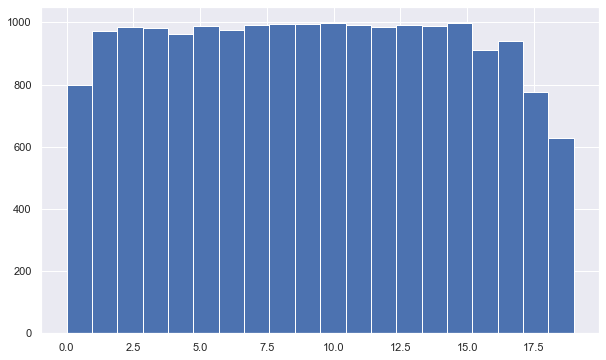

In [8]:
sns.set(rc={'figure.figsize':(10,6)})
df['target'].hist(bins=df.target.nunique())

In [9]:
df

,text,target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4
...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
18842,\nNot in isolated ground recepticles (usually ...,12
18843,I just installed a DX2-66 CPU in a clone mothe...,3
18844,\nWouldn't this require a hyper-sphere. In 3-...,1


In [10]:
#remove emails
df['text'] = df['text'].apply(lambda row: re.sub(r"\S*@\S*\s?","",row))

#remove single quote marks
df['text'] = df['text'].apply(lambda row: re.sub(r"\'","",row))

#make all text lower case
df['text'] = df['text'].str.lower()

#remove numerics
df['text'] = df['text'].apply(lambda row: re.sub(r"\d+","",row))

#remove words with fewer than 3 characters
df['text'] = df['text'].apply(lambda row: re.sub(r'\b\w{1,2}\b', '',row))

#remove extra spaces
df['text'] = df['text'].apply(lambda row: re.sub(r"\s+"," ",row))

df

,text,target
0,sure some bashers pens fans are pretty confus...,10
1,brother the market for high-performance video...,3
2,finally you said what you dream about. medite...,17
3,think! its the scsi card doing the dma transf...,3
4,) have old jasmine drive which cannot use with...,4
...,...,...
18841,> from: (david nye) > neurology > consultation...,13
18842,not isolated ground recepticles (usually unus...,12
18843,"just installed - cpu clone motherboard, and t...",3
18844,"wouldnt this require hyper-sphere. -space, po...",1


In [11]:
df.isna().any()

text      False
target    False
dtype: bool

In [12]:
#instatiate tokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

#tokenize test
df['tokenized_text'] = df.apply(lambda row: tokenizer.tokenize(row['text']),axis=1)

#define stop words
stop_words=set(stopwords.words("english"))

#remove stop words
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [item for item in x if item not in stop_words])

#instantiate lemmatizer
lemmatizer = WordNetLemmatizer()

#lemmatize text
df['lemmatized'] = df['tokenized_text'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
df.lemmatized = df.lemmatized.apply(lambda x: " ".join(x) )

df.sample(5)

,text,target,tokenized_text,lemmatized
1751,", that sounds pretty reasonable for that car a...",7,"[sounds, pretty, reasonable, car, city, unless...",sound pretty reasonable car city unless accide...
15292,have for sale hayes personal modem (external)...,6,"[sale, hayes, personal, modem, external, macin...",sale hayes personal modem external macintosh r...
17028,have spare fluke . this true rms digital mete...,12,"[spare, fluke, true, rms, digital, meter, digi...",spare fluke true rms digital meter digit displ...
6377,... one the items the group folder (typically ...,2,"[one, items, group, folder, typically, called,...",one item group folder typically called norton ...
7180,(robert beauchaine;;-;=;yayg) pontificated: wo...,0,"[robert, beauchaine, yayg, pontificated, would...",robert beauchaine yayg pontificated would gues...


In [13]:
df

,text,target,tokenized_text,lemmatized
0,sure some bashers pens fans are pretty confus...,10,"[sure, bashers, pens, fans, pretty, confused, ...",sure bashers pen fan pretty confused lack kind...
1,brother the market for high-performance video...,3,"[brother, market, high, performance, video, ca...",brother market high performance video card sup...
2,finally you said what you dream about. medite...,17,"[finally, said, dream, mediterranean, new, are...",finally said dream mediterranean new area grea...
3,think! its the scsi card doing the dma transf...,3,"[think, scsi, card, dma, transfers, disks, scs...",think scsi card dma transfer disk scsi card dm...
4,) have old jasmine drive which cannot use with...,4,"[old, jasmine, drive, cannot, use, new, system...",old jasmine drive cannot use new system unders...
...,...,...,...,...
18841,> from: (david nye) > neurology > consultation...,13,"[david, nye, neurology, consultation, cheaper,...",david nye neurology consultation cheaper scan ...
18842,not isolated ground recepticles (usually unus...,12,"[isolated, ground, recepticles, usually, unusu...",isolated ground recepticles usually unusual co...
18843,"just installed - cpu clone motherboard, and t...",3,"[installed, cpu, clone, motherboard, tried, mo...",installed cpu clone motherboard tried mounting...
18844,"wouldnt this require hyper-sphere. -space, po...",1,"[wouldnt, require, hyper, sphere, space, point...",wouldnt require hyper sphere space point speci...


In [14]:
df.tokenized_text.isna().any()

False

In [15]:
df.rename(columns={'lemmatized':'preprocessed_text'},inplace=True)

df

,text,target,tokenized_text,preprocessed_text
0,sure some bashers pens fans are pretty confus...,10,"[sure, bashers, pens, fans, pretty, confused, ...",sure bashers pen fan pretty confused lack kind...
1,brother the market for high-performance video...,3,"[brother, market, high, performance, video, ca...",brother market high performance video card sup...
2,finally you said what you dream about. medite...,17,"[finally, said, dream, mediterranean, new, are...",finally said dream mediterranean new area grea...
3,think! its the scsi card doing the dma transf...,3,"[think, scsi, card, dma, transfers, disks, scs...",think scsi card dma transfer disk scsi card dm...
4,) have old jasmine drive which cannot use with...,4,"[old, jasmine, drive, cannot, use, new, system...",old jasmine drive cannot use new system unders...
...,...,...,...,...
18841,> from: (david nye) > neurology > consultation...,13,"[david, nye, neurology, consultation, cheaper,...",david nye neurology consultation cheaper scan ...
18842,not isolated ground recepticles (usually unus...,12,"[isolated, ground, recepticles, usually, unusu...",isolated ground recepticles usually unusual co...
18843,"just installed - cpu clone motherboard, and t...",3,"[installed, cpu, clone, motherboard, tried, mo...",installed cpu clone motherboard tried mounting...
18844,"wouldnt this require hyper-sphere. -space, po...",1,"[wouldnt, require, hyper, sphere, space, point...",wouldnt require hyper sphere space point speci...


In [16]:
#train test validation split

X,y = df.preprocessed_text,df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [17]:
# test = pd.merge(X_train.to_frame(),y_train.to_frame())

y_train.to_frame()

,target
8521,12
6839,10
6191,5
6491,7
4865,2
...,...
12477,17
6168,7
10556,16
8822,6


In [18]:
X_train.to_frame()

,preprocessed_text
8521,people interested every aspect try zine connec...
6839,
6191,dont know great deal support uim tell good sup...
6491,probably told dad buy car dream might come true
4865,make sure use small font driver large font dri...
...,...
12477,pardon tim see possible idf fail detect presen...
6168,
10556,vast majority get life without ever use displa...
8822,gotta pay well bill eating mere passing intere...


In [24]:
train_df = X_train.to_frame().merge(y_train.to_frame(),left_index=True,right_index=True)
val_df = X_val.to_frame().merge(y_val.to_frame(),left_index=True,right_index=True)
test_df = X_test.to_frame().merge(y_test.to_frame(),left_index=True,right_index=True)

In [29]:
train_df.to_csv(r'Data/train.csv', index = True)
val_df.to_csv(r'Data/val.csv', index = True)
test_df.to_csv(r'Data/test.csv', index = True)

In [21]:
accuracy = make_scorer(accuracy_score)
precision = make_scorer(precision_score, average='macro')
recall =  make_scorer(recall_score, average='macro')
f1 = make_scorer(f1_score, average='macro')
scoring={'accuracy':accuracy,'precision':precision,'recall':recall,'f1':f1}

scoring.items()

dict_items([('accuracy', make_scorer(accuracy_score)), ('precision', make_scorer(precision_score, average=macro)), ('recall', make_scorer(recall_score, average=macro)), ('f1', make_scorer(f1_score, average=macro))])

In [22]:
def multiclass_confusion_matrix(true, pred):
    cm = confusion_matrix(true,pred)
    df_cm = pd.DataFrame(cm,
                         index = [f'TRUE_{target}' for target in list(range(0,20))],
                         columns = [f'PRED_{target}' for target in list(range(0,20))])
    sns.heatmap(df_cm, annot=True,annot_kws={'size':10},cmap='Blues',fmt='g')

In [23]:
pred_val = gs_logreg.predict(X_val)

NameError: name 'gs_logreg' is not defined

In [ ]:
# plt.figure(figsize=(10,10))
multiclass_confusion_matrix(y_val,pred_val)
print(f'{accuracy_score.__name__}: {accuracy_score(y_val, pred_val):.4f}')
for scorer in [precision_score,recall_score,f1_score]:
    name = scorer.__name__
    print(f'{name}: {scorer(y_val, pred_val,average="micro"):.4f}')